In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [75]:
teams = pd.read_csv('teams.csv')
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


## Data cleaning

In [76]:
# teams.dropna(inplace=True)

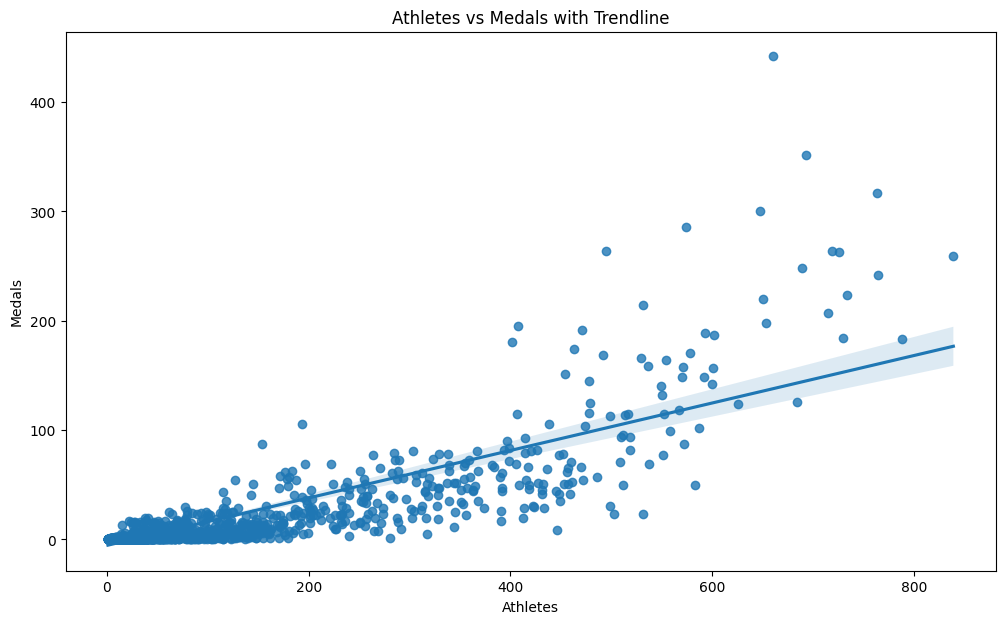

In [77]:
plt.figure(figsize=(12, 7))
sns.regplot(x=teams['athletes'], 
            y=teams['medals'])
plt.xlabel('Athletes')
plt.ylabel('Medals')
plt.title('Athletes vs Medals with Trendline')
plt.show()

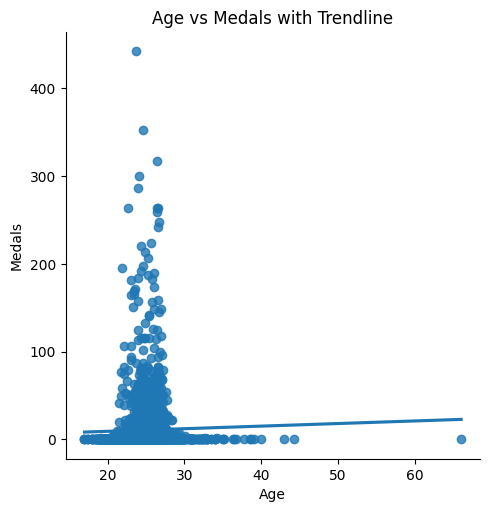

In [78]:
sns.lmplot(x='age', 
           y='medals', 
           data=teams, 
           fit_reg=True, 
           ci=None)
plt.xlabel('Age')
plt.ylabel('Medals')
plt.title('Age vs Medals with Trendline')
plt.show()

<Axes: ylabel='Frequency'>

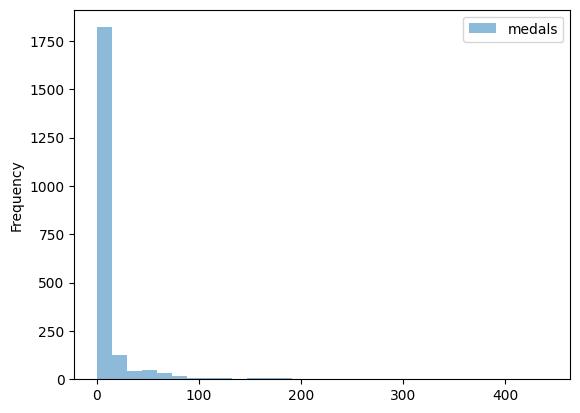

In [79]:
teams.plot.hist(y='medals', bins=30, alpha=0.5)

In [80]:
teams[teams.isnull().any(axis=1)]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
19,ALB,Albania,1992,8,9,25.3,163.0,75.2,0,NaN,NaN
26,ALG,Algeria,1964,7,7,26.0,175.0,65.0,0,NaN,NaN
39,AND,Andorra,1976,2,3,28.3,174.7,78.0,0,NaN,NaN
50,ANG,Angola,1980,14,17,17.4,171.7,62.5,0,NaN,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,178.6,71.6,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,157.0,57.0,0,NaN,NaN
2103,YAR,North Yemen,1984,3,3,27.7,163.3,57.7,0,NaN,NaN
2105,YEM,Yemen,1992,8,8,19.6,169.0,60.0,0,NaN,NaN
2112,YMD,South Yemen,1988,5,5,23.6,175.0,63.3,0,NaN,NaN


In [81]:
#Drop rows with null values
teams.dropna(inplace=True)
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


## Split the data

In [82]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [83]:
train.shape, test.shape

((1609, 11), (405, 11))

## Train the model

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [85]:
predictors = ['athletes', 'prev_medals']    
target = 'medals'

In [86]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [87]:
predictions = reg.predict(test[predictors])

In [88]:
test["predictions"] = predictions

In [89]:
test["predictions"] = predictions
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,-0.961221
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,-1.176333
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,-1.425032
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,-1.711847
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,2.155629
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,-1.926958
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,-1.640143
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,-1.640143
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,1.505767


In [90]:
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,0.0
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,0.0
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,0.0
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.0


In [91]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [92]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [93]:
test[test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
2053,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,274.0,285.0
2054,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,276.0,236.0


In [94]:
test[test["team"] == "KEN"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
1066,KEN,Kenya,2012,23,51,24.6,169.4,57.9,11,15.0,9.7,13.0
1067,KEN,Kenya,2016,29,80,26.6,170.6,65.2,13,11.0,11.0,12.0


In [95]:
test[test["team"] == "NGR"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
1447,NGR,Nigeria,2012,31,58,25.1,179.6,75.4,0,23.0,13.0,19.0
1448,NGR,Nigeria,2016,36,77,25.6,177.6,76.5,18,0.0,10.3,3.0


In [96]:
errors = test["medals"] - test["predictions"]
errors

6       1.0
7       0.0
24      0.0
25      0.0
37     -1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142   -2.0
2143    0.0
Length: 405, dtype: float64

In [97]:
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG   -1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM   -1.0
Length: 204, dtype: float64

In [98]:
error_by_team = errors.groupby(test["team"]).mean()

In [99]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [100]:
error_ratio = error_by_team / medals_by_team
error_ratio

team
AFG    1.0
ALB    NaN
ALG   -1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM   -inf
Length: 204, dtype: float64

In [101]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG   -1.000000
ARG   -0.853659
ARM   -0.142857
AUS   -0.367347
         ...   
USA   -0.017578
UZB    0.250000
VEN   -1.750000
VIE    1.000000
ZIM        -inf
Length: 102, dtype: float64

In [102]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG   -1.000000
ARG   -0.853659
ARM   -0.142857
AUS   -0.367347
         ...   
UKR   -0.951220
USA   -0.017578
UZB    0.250000
VEN   -1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

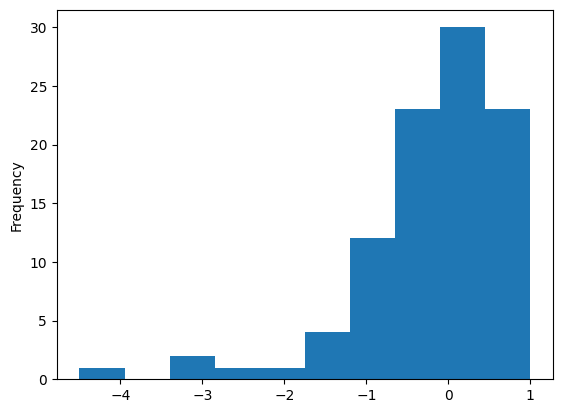

In [103]:
error_ratio.plot.hist()

In [104]:
error_ratio.sort_values()

team
AUT   -4.500000
POR   -3.333333
HKG   -3.000000
EGY   -2.400000
MAR   -2.000000
         ...   
CIV    1.000000
BOT    1.000000
BDI    1.000000
PHI    1.000000
VIE    1.000000
Length: 97, dtype: float64

In [105]:
# Add in more predictors
# Try